# Analysis

In [25]:
##

In [26]:
# Import dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import seaborn as sb
import numpy as np
import datetime
from pprint import pprint
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [27]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [28]:
# Twitter credentials and APi authentification
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [29]:
# List to hold results
sentiment = []
# List to hold results
results_list = []

# Target Search Term
target_users = ("@RTC", "@APTA_Transit","@Bart","@MTA","@CTA")
target_hashtags = ("#UBER", "#LYFT")

# Variables for holding sentiments
# compound_list = []
# positive_list = []
# negative_list = []
# neutral_list = []

In [30]:
# Loop through all target users
for user in target_users:
    
    # count the tweet    
    counter = 0
    
    # Grab 100 tweets
    public_tweets = api.search(user, count=500, result_type="recent")
#     pprint (public_tweets)
        
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweet_text = tweet["text"]
        tweets_count = counter

        #Add sentiments for ech tweet to the sentiments list
        sentiment.append ({"User": user,
            "Date": tweet["created_at"],
            "Compound": compound,
            "Positive": pos,
            "Neutral": neu,
            "Negative": neg,
            "Tweet text": tweet_text,
            "Tweet Count": counter})

        counter = counter + 1

            # Print the Sentiments
    pprint(sentiment)
    
    # Append airline results to 'results_list'
    results_list.append(sentiment)

[{'Compound': 0.0,
  'Date': 'Fri Apr 06 11:13:59 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 0,
  'Tweet text': 'RT @SPCIQ: #incendie 3330 Monnerie sous contrôle .Bâtiment '
                'résidentiel 16 logements . Plusieurs personnes prises en '
                'charge par la Croix Rou…',
  'User': '@RTC'},
 {'Compound': 0.0,
  'Date': 'Fri Apr 06 07:39:31 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 1,
  'Tweet text': '#incendie 3330 Monnerie sous contrôle .Bâtiment résidentiel '
                '16 logements . Plusieurs personnes prises en charge par… '
                'https://t.co/QDmsK0cn6p',
  'User': '@RTC'},
 {'Compound': 0.4939,
  'Date': 'Thu Apr 05 18:32:22 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.849,
  'Positive': 0.151,
  'Tweet Count': 2,
  'Tweet text': 'RT @maxgeorge100: Oh the joys of looking at twitter on a '
                'packed commuter train 😉😈😍😍 @empresswishes @DommeL

 {'Compound': 0.4588,
  'Date': 'Mon Apr 09 14:57:26 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 61,
  'Tweet text': 'RT @APTA_Transit: We applaud Congress for standing up for '
                'public transit &amp; increasing investment in its 2018 '
                'budget.  Keep it up for 2019 a…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 09 14:54:14 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 62,
  'Tweet text': 'RT @APTA_Transit: We applaud Congress for standing up for '
                'public transit &amp; increasing investment in its 2018 '
                'budget.  Keep it up for 2019 a…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 09 14:53:12 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 63,
  'Tweet text': 'RT @APTA_Transit: We applaud Congress for standing up for '
                'publi

  'Negative': 0.0,
  'Neutral': 0.843,
  'Positive': 0.157,
  'Tweet Count': 89,
  'Tweet text': 'RT @APTA_Transit: #PublicTransit keeps America moving! Our '
                'public transportation #infrastructure supports mobility and '
                'independent living f…',
  'User': '@APTA_Transit'},
 {'Compound': 0.7003,
  'Date': 'Wed Apr 04 21:18:57 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.756,
  'Positive': 0.244,
  'Tweet Count': 90,
  'Tweet text': 'RT @APTA_Transit: #Publictransportation has long operated in '
                'communities large and small. It helps younger people save '
                'money and allows sen…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4199,
  'Date': 'Wed Apr 04 20:41:00 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.843,
  'Positive': 0.157,
  'Tweet Count': 91,
  'Tweet text': 'RT @APTA_Transit: #PublicTransit keeps America moving! Our '
                'public transportation #infrastructure supports mobility and '
                

  'Date': 'Mon Apr 09 14:57:26 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 61,
  'Tweet text': 'RT @APTA_Transit: We applaud Congress for standing up for '
                'public transit &amp; increasing investment in its 2018 '
                'budget.  Keep it up for 2019 a…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 09 14:54:14 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 62,
  'Tweet text': 'RT @APTA_Transit: We applaud Congress for standing up for '
                'public transit &amp; increasing investment in its 2018 '
                'budget.  Keep it up for 2019 a…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 09 14:53:12 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 63,
  'Tweet text': 'RT @APTA_Transit: We applaud Congress for standing up for '
                'public transit &amp; increa

  'Date': 'Mon Apr 09 14:01:23 +0000 2018',
  'Negative': 0.304,
  'Neutral': 0.696,
  'Positive': 0.0,
  'Tweet Count': 8,
  'Tweet text': 'Literally tried rapping "fuck everybody on this train" @bart',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Mon Apr 09 14:00:36 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 9,
  'Tweet text': 'A 17 year old boy was smoking crack on @bart',
  'User': '@Bart'},
 {'Compound': 0.4404,
  'Date': 'Mon Apr 09 12:57:45 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.873,
  'Positive': 0.127,
  'Tweet Count': 10,
  'Tweet text': '@Tamayenboys @bart Once I saw the vests &amp; heard her '
                'talking about their training I felt better. Here in CA we’ve '
                'go… https://t.co/OoiTYbmaFc',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Mon Apr 09 12:04:18 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 11,
  'Tweet text': '@bart https://t.co/cqyMZ4jO

  'User': '@Bart'},
 {'Compound': -0.8658,
  'Date': 'Tue Apr 03 00:24:35 +0000 2018',
  'Negative': 0.433,
  'Neutral': 0.567,
  'Positive': 0.0,
  'Tweet Count': 42,
  'Tweet text': '@bart are you crazy cutting 3 trains at rush hour to Concord? '
                'Station chaos, trains overfilled. Shame on you',
  'User': '@Bart'},
 {'Compound': -0.636,
  'Date': 'Mon Apr 02 22:06:00 +0000 2018',
  'Negative': 0.189,
  'Neutral': 0.811,
  'Positive': 0.0,
  'Tweet Count': 43,
  'Tweet text': 'Am Freitag erscheint endlich die neue Filth on Acid! @Bart '
                'Skils und @ReinZonneveld haben mit "Snakecharmer" ein Te… '
                'https://t.co/EScqwcZ9hJ',
  'User': '@Bart'}]
[{'Compound': 0.0,
  'Date': 'Fri Apr 06 11:13:59 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 0,
  'Tweet text': 'RT @SPCIQ: #incendie 3330 Monnerie sous contrôle .Bâtiment '
                'résidentiel 16 logements . Plusieurs personnes prises en '
       

  'Positive': 0.151,
  'Tweet Count': 71,
  'Tweet text': 'RT @SharedUseCntr: A Dialogue on Strengthening Sustainability '
                'and Equity in Federal and State Policy w/ @MZStrat of MZ '
                'Strategies, @darnell…',
  'User': '@APTA_Transit'},
 {'Compound': 0.3612,
  'Date': 'Sat Apr 07 13:46:45 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.872,
  'Positive': 0.128,
  'Tweet Count': 72,
  'Tweet text': 'RT @APTA_Transit: A majority of Mayors surveyed stated '
                'affordable housing &amp; #publictransit were biggest needs to '
                'attract millennials. https…',
  'User': '@APTA_Transit'},
 {'Compound': 0.2732,
  'Date': 'Sat Apr 07 13:46:35 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.896,
  'Positive': 0.104,
  'Tweet Count': 73,
  'Tweet text': 'RT @APTA_Transit: DYK: Every $10 million in capital '
                'investment in #publictransportation yields $30 million in '
                'increased business sales.\n'
              

  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 25,
  'Tweet text': 'Нехай все необхідне завжди буде поруч: тепло, натхнення та '
                'надійна техніка) Фото @bart.kos https://t.co/JSX8QpBXNN',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Thu Apr 05 18:57:19 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 26,
  'Tweet text': '@excelsior_sf @JennyGShao @SRobertsKRON4 @KTVU @kron4 @kpix '
                '@abc7newsbayarea @StevenAveson @HeatherKTVU @DionLimTV… '
                'https://t.co/Z85rXWVtfm',
  'User': '@Bart'},
 {'Compound': 0.0516,
  'Date': 'Thu Apr 05 17:39:08 +0000 2018',
  'Negative': 0.225,
  'Neutral': 0.631,
  'Positive': 0.144,
  'Tweet Count': 27,
  'Tweet text': 'RT @bart: Doctors shortage + demand &gt; Millennials demand '
                'telehealth in a move away from traditional primary care model '
                'https://t.co/BXgeTjx…',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Thu Apr 05 1

  'Tweet Count': 35,
  'Tweet text': 'RT @iamChrisVolpe: @MTA Why is my Manhattan bound C stalled @ '
                'Hoyt-Schermerhorn? How can you fuck the same thing up every '
                'day?',
  'User': '@MTA'},
 {'Compound': -0.5719,
  'Date': 'Thu Apr 12 15:28:56 +0000 2018',
  'Negative': 0.198,
  'Neutral': 0.802,
  'Positive': 0.0,
  'Tweet Count': 36,
  'Tweet text': 'RT @eorlins: Meanwhile, my clients spend time in jail for '
                'stealing $2.75 from the @MTA. https://t.co/0beSM13hzx',
  'User': '@MTA'},
 {'Compound': 0.5023,
  'Date': 'Thu Apr 12 15:28:07 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.881,
  'Positive': 0.119,
  'Tweet Count': 37,
  'Tweet text': 'RT @AMERICA_PARTII: Which third world country is this?\n'
                '\n'
                'You would never guess it but it is queens NY. \n'
                '\n'
                'Third @mta train like this and this…',
  'User': '@MTA'},
 {'Compound': -0.6249,
  'Date': 'Thu Apr 12 15:27:28

                'personally victimized by the @MTA https://t.co/Z9y8chNVdt',
  'User': '@MTA'},
 {'Compound': -0.4588,
  'Date': 'Thu Apr 12 14:54:24 +0000 2018',
  'Negative': 0.111,
  'Neutral': 0.889,
  'Positive': 0.0,
  'Tweet Count': 90,
  'Tweet text': 'RT @TweetBenMax: A closer look at where things stand on @MTA '
                'funding, just after the State forced the City to put up $ for '
                'Subway Action Pl…',
  'User': '@MTA'},
 {'Compound': 0.4588,
  'Date': 'Thu Apr 12 14:54:17 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.842,
  'Positive': 0.158,
  'Tweet Count': 91,
  'Tweet text': 'Arrival at Delaney &amp; Clinton where @CMReynoso34 &amp; '
                '@KeithPowersNYC applaud the #PeopleWay &amp; #BikeTrain '
                'efforts from… https://t.co/7GBxKrcTij',
  'User': '@MTA'},
 {'Compound': 0.8779,
  'Date': 'Thu Apr 12 14:54:00 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.519,
  'Positive': 0.481,
  'Tweet Count': 92,
  'Tweet text': '

  'Tweet Count': 63,
  'Tweet text': 'RT @APTA_Transit: We applaud Congress for standing up for '
                'public transit &amp; increasing investment in its 2018 '
                'budget.  Keep it up for 2019 a…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 09 14:49:52 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 64,
  'Tweet text': 'RT @APTA_Transit: We applaud Congress for standing up for '
                'public transit &amp; increasing investment in its 2018 '
                'budget.  Keep it up for 2019 a…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 09 14:42:53 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 65,
  'Tweet text': 'RT @APTA_Transit: We applaud Congress for standing up for '
                'public transit &amp; increasing investment in its 2018 '
                'budget.  Keep it up for 2019 a…',
  'User': '@APTA_Transi

  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 17,
  'Tweet text': 'Virtuele coaches en activiteitsensor  voor betere '
                'hartrevalidatie https://t.co/TkYqfwa1mY  #HartRevalidatie '
                '#eCoach @micbelgique @bart',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Sat Apr 07 05:06:29 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 18,
  'Tweet text': 'RT @mmsksie: Amanda Cawston talking about nudging and '
                'education (here pointing to her co-authors) @AlfredArcher2 '
                '@Bart Engelen— all from @T…',
  'User': '@Bart'},
 {'Compound': 0.0,
  'Date': 'Sat Apr 07 02:58:09 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 19,
  'Tweet text': 'RT @mmsksie: Amanda Cawston talking about nudging and '
                'education (here pointing to her co-authors) @AlfredArcher2 '
                '@Bart Engelen— all from @T…',
  'User': '@Bart'},
 {'Compound': 

  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 27,
  'Tweet text': '&amp; then, @MTA bus get mirror hit at Pennsylvania Ave @ '
                'Belt Parkway entrance ramp. ourch. @NYDailyNews '
                'https://t.co/5ziVVfQlbN',
  'User': '@MTA'},
 {'Compound': -0.296,
  'Date': 'Thu Apr 12 15:30:24 +0000 2018',
  'Negative': 0.104,
  'Neutral': 0.896,
  'Positive': 0.0,
  'Tweet Count': 28,
  'Tweet text': "@iamChrisVolpe @MTA This is everyday now with Cuomo's MTA. If "
                'you stop maintaining the system eventually it will br… '
                'https://t.co/7iU72MXRYW',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Thu Apr 12 15:30:19 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 29,
  'Tweet text': 'RT @djcflo: this is the A/C platform at Utica Ave in '
                'Brooklyn. if the @MTA can’t operate normally on a daily '
                'basis, how do you think that L…',
  'User': '@MTA'},
 {'Compound': 0

  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 81,
  'Tweet text': '@MTA Utica.',
  'User': '@MTA'},
 {'Compound': 0.1027,
  'Date': 'Thu Apr 12 14:57:58 +0000 2018',
  'Negative': 0.147,
  'Neutral': 0.684,
  'Positive': 0.168,
  'Tweet Count': 82,
  'Tweet text': 'RT @_shazthephotog: raise your hand if you’ve ever felt '
                'personally victimized by the @MTA https://t.co/Z9y8chNVdt',
  'User': '@MTA'},
 {'Compound': 0.3182,
  'Date': 'Thu Apr 12 14:57:40 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.753,
  'Positive': 0.247,
  'Tweet Count': 83,
  'Tweet text': 'RT @ughitsaaron: cool photo of the @MTA '
                'https://t.co/vRuqh3MERL',
  'User': '@MTA'},
 {'Compound': 0.3182,
  'Date': 'Thu Apr 12 14:57:25 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.753,
  'Positive': 0.247,
  'Tweet Count': 84,
  'Tweet text': 'RT @ughitsaaron: cool photo of the @MTA '
                'https://t.co/vRuqh3MERL',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Thu Ap

  'Positive': 0.0,
  'Tweet Count': 35,
  'Tweet text': 'CTA blue line Montrose stop - after a 6:35 am train to '
                'downtown, no train for another 17 minutes. @cta #shame '
                '#ctasucks',
  'User': '@CTA'},
 {'Compound': 0.6114,
  'Date': 'Thu Apr 12 11:47:33 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.769,
  'Positive': 0.231,
  'Tweet Count': 36,
  'Tweet text': 'RT @chicagobulls: All aboard the #LollaTrain! Catch the @CTA '
                'train downtown in the loop for some special surprises from '
                'the Bulls and @Loll…',
  'User': '@CTA'},
 {'Compound': 0.7906,
  'Date': 'Thu Apr 12 11:12:15 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.682,
  'Positive': 0.318,
  'Tweet Count': 37,
  'Tweet text': 'RT @AlexMaragosNBC: Good morning- @AndyAvalosNBC5 has a great '
                'forecast ☀️🌡️but changes coming + @MRelerfordNBC live on '
                'police opening fire…',
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Thu Apr

                '“How often does the train go by?”\n'
                '\n'
                "“So often you don't even notice it.”\n"
                '\n'
                '#Blues…',
  'User': '@CTA'},
 {'Compound': -0.4019,
  'Date': 'Wed Apr 11 23:01:28 +0000 2018',
  'Negative': 0.114,
  'Neutral': 0.886,
  'Positive': 0.0,
  'Tweet Count': 90,
  'Tweet text': 'RT @cta: Some Forest Park-bound Blue Line trains are '
                'operating with residual delays after an earlier mechanical '
                'problem on a train at Weste…',
  'User': '@CTA'},
 {'Compound': 0.6588,
  'Date': 'Wed Apr 11 23:01:15 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.785,
  'Positive': 0.215,
  'Tweet Count': 91,
  'Tweet text': 'Ack! Is @Cta bringing back their #Redline announcements for '
                '@Cubs games? Those were great last season. #AvoidingTheCrowds',
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Wed Apr 11 22:58:39 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positiv

In [31]:
news_sentiment_df = pd.DataFrame.from_dict(sentiment).round(3)
news_sentiment_df["User"].describe()
# news_sentiment_df

count      350
unique       5
top       @CTA
freq       100
Name: User, dtype: object

In [ ]:
#Pull in Uber and Lyft tweets
# Loop through all target users
for user in target_users:
    
    # count the tweet    
    counter = 0
    
    # Grab 100 tweets
    public_tweets = api.search(user, count=100, result_type="recent")
#     pprint (public_tweets)
        
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweet_text = tweet["text"]
        tweets_count = counter

        #Add sentiments for ech tweet to the sentiments list
        sentiment.append ({"User": user,
            "Date": tweet["created_at"],
            "Compound": compound,
            "Positive": pos,
            "Neutral": neu,
            "Negative": neg,
            "Tweet text": tweet_text,
            "Tweet Count": counter})

        counter = counter + 1

            # Print the Sentiments
    pprint(sentiment)
    
    # Append airline results to 'results_list'
    results_list.append(sentiment)

In [32]:
news_sentiments_csv= news_sentiment_df[['User','Date','Tweet text','Compound','Positive','Neutral','Negative','Tweet Count']]
news_sentiments_csv

,User,Date,Tweet text,Compound,Positive,Neutral,Negative,Tweet Count
0,@RTC,Fri Apr 06 11:13:59 +0000 2018,RT @SPCIQ: #incendie 3330 Monnerie sous contrô...,0.000,0.000,1.000,0.000,0
1,@RTC,Fri Apr 06 07:39:31 +0000 2018,#incendie 3330 Monnerie sous contrôle .Bâtimen...,0.000,0.000,1.000,0.000,1
2,@RTC,Thu Apr 05 18:32:22 +0000 2018,RT @maxgeorge100: Oh the joys of looking at tw...,0.494,0.151,0.849,0.000,2
3,@RTC,Thu Apr 05 18:18:44 +0000 2018,RT @maxgeorge100: Oh the joys of looking at tw...,0.494,0.151,0.849,0.000,3
4,@RTC,Thu Apr 05 18:16:52 +0000 2018,Oh the joys of looking at twitter on a packed ...,0.494,0.167,0.833,0.000,4
5,@RTC,Wed Apr 04 16:08:54 +0000 2018,@rtc #canadiansinlondon https://t.co/OCKpLvWNVf,0.000,0.000,1.000,0.000,5
6,@APTA_Transit,Thu Apr 12 15:37:38 +0000 2018,RT @NADTCmobility: It’s great to be a part of ...,0.625,0.186,0.814,0.000,0
7,@APTA_Transit,Thu Apr 12 15:33:58 +0000 2018,RT @TheRapid: Did you know? Households in tran...,0.000,0.000,1.000,0.000,1
8,@APTA_Transit,Thu Apr 12 15:33:24 +0000 2018,RT @APTA_Transit: Congratulations to @RideKCTr...,0.855,0.439,0.561,0.000,2
9,@APTA_Transit,Thu Apr 12 15:16:35 +0000 2018,RT @NADTCmobility: It’s great to be a part of ...,0.625,0.186,0.814,0.000,3


In [33]:
news_sentiments_csv.head(500)

,User,Date,Tweet text,Compound,Positive,Neutral,Negative,Tweet Count
0,@RTC,Fri Apr 06 11:13:59 +0000 2018,RT @SPCIQ: #incendie 3330 Monnerie sous contrô...,0.000,0.000,1.000,0.000,0
1,@RTC,Fri Apr 06 07:39:31 +0000 2018,#incendie 3330 Monnerie sous contrôle .Bâtimen...,0.000,0.000,1.000,0.000,1
2,@RTC,Thu Apr 05 18:32:22 +0000 2018,RT @maxgeorge100: Oh the joys of looking at tw...,0.494,0.151,0.849,0.000,2
3,@RTC,Thu Apr 05 18:18:44 +0000 2018,RT @maxgeorge100: Oh the joys of looking at tw...,0.494,0.151,0.849,0.000,3
4,@RTC,Thu Apr 05 18:16:52 +0000 2018,Oh the joys of looking at twitter on a packed ...,0.494,0.167,0.833,0.000,4
5,@RTC,Wed Apr 04 16:08:54 +0000 2018,@rtc #canadiansinlondon https://t.co/OCKpLvWNVf,0.000,0.000,1.000,0.000,5
6,@APTA_Transit,Thu Apr 12 15:37:38 +0000 2018,RT @NADTCmobility: It’s great to be a part of ...,0.625,0.186,0.814,0.000,0
7,@APTA_Transit,Thu Apr 12 15:33:58 +0000 2018,RT @TheRapid: Did you know? Households in tran...,0.000,0.000,1.000,0.000,1
8,@APTA_Transit,Thu Apr 12 15:33:24 +0000 2018,RT @APTA_Transit: Congratulations to @RideKCTr...,0.855,0.439,0.561,0.000,2
9,@APTA_Transit,Thu Apr 12 15:16:35 +0000 2018,RT @NADTCmobility: It’s great to be a part of ...,0.625,0.186,0.814,0.000,3


In [16]:
#Export DataFrame to csv
news_sentiment_df.to_csv("News_Mood_Twitter.csv", index=False)

In [17]:
news_sentiment_compound_df = news_sentiment_df.groupby("User")["Compound"].mean()
news_sentiment_compound_df

User
@APTA_Transit    0.386440
@Bart           -0.060318
@CTA             0.070280
@Lyft            0.158510
@MTA            -0.033520
@RTC             0.247000
@Uber            0.147580
Name: Compound, dtype: float64

In [18]:
news_sentiment_positive_df = news_sentiment_df.groupby("User")["Positive"].mean()
news_sentiment_positive_df

User
@APTA_Transit    0.157570
@Bart            0.069545
@CTA             0.108940
@Lyft            0.100020
@MTA             0.089930
@RTC             0.078167
@Uber            0.093280
Name: Positive, dtype: float64

In [19]:
news_sentiment_neutral_df = news_sentiment_df.groupby("User")["Neutral"].mean()
news_sentiment_neutral_df

User
@APTA_Transit    0.834320
@Bart            0.851818
@CTA             0.828530
@Lyft            0.864010
@MTA             0.803600
@RTC             0.921833
@Uber            0.868410
Name: Neutral, dtype: float64

In [20]:
news_sentiment_negative_df = news_sentiment_df.groupby("User")["Negative"].mean()
news_sentiment_negative_df

User
@APTA_Transit    0.008130
@Bart            0.078636
@CTA             0.062540
@Lyft            0.035940
@MTA             0.106280
@RTC             0.000000
@Uber            0.038340
Name: Negative, dtype: float64

In [21]:
summary_breakdown = pd.DataFrame({"Compound":news_sentiment_compound_df,
                                  "Positive":news_sentiment_positive_df, 
                                  "Neutral":news_sentiment_neutral_df,
                                  "Negative":news_sentiment_negative_df})
summary_breakdown

,Compound,Negative,Neutral,Positive
User,,,,
@APTA_Transit,0.386440,0.008130,0.834320,0.157570
@Bart,-0.060318,0.078636,0.851818,0.069545
@CTA,0.070280,0.062540,0.828530,0.108940
@Lyft,0.158510,0.035940,0.864010,0.100020
@MTA,-0.033520,0.106280,0.803600,0.089930
@RTC,0.247000,0.000000,0.921833,0.078167
@Uber,0.147580,0.038340,0.868410,0.093280


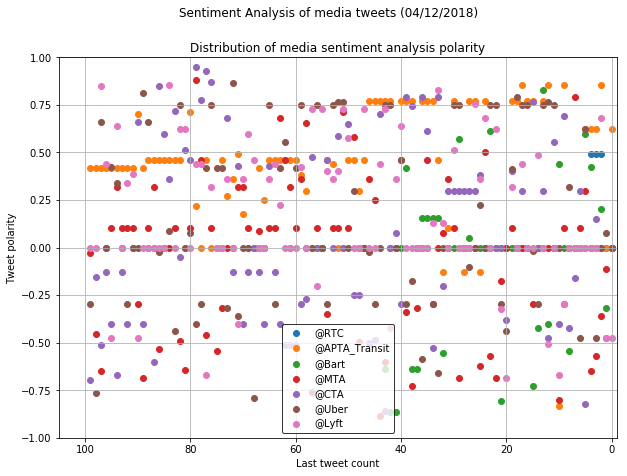

In [22]:
date = time.strftime("%m/%d/%Y")

plt.figure(figsize = (10,7))
plt.xlim(105,-1)
plt.ylim(-1,1)
plt.grid()

#plot scatterplot using a for loop.
for user in target_users:
    dataframe = news_sentiment_df.loc[news_sentiment_df["User"] == user]
    plt.scatter(dataframe["Tweet Count"],dataframe["Compound"],label = user)    
    

#Title, axis plot
plt.suptitle("Sentiment Analysis of media tweets (%s)"% (date))
plt.title("Distribution of media sentiment analysis polarity")
plt.xlabel("Last tweet count")
plt.ylabel("Tweet polarity")

legend = plt.legend(frameon = True, edgecolor = "black")

# Save an image of the chart and print to screen
plt.savefig("Sentiment_analysis_meadia_tweets.png")
plt.show()


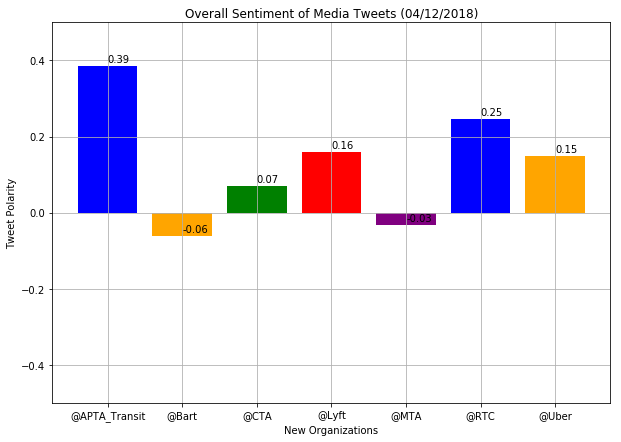

In [23]:
plt.figure(figsize = (10,7))
plt.ylim(-0.5,0.5)
plt.grid()

colors = ["blue", "orange", "green","red","purple"]
x_axis = np.arange(len(news_sentiment_compound_df))
xlabels = news_sentiment_compound_df.index
count = 0

for sentiment in news_sentiment_compound_df:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
    
plt.bar(x_axis, news_sentiment_compound_df, tick_label = xlabels, color = colors)
#Set title, x axis label, and y axis label.


plt.title("Overall Sentiment of Media Tweets (%s)"% (date))
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall_sentiment_of_media_tweets.png")
plt.show()